# Part 1: Predict the price of a house
 
### Dataset: <DS - Assignment Part 1 data set.xlsx>

Link: [https://www.dropbox.com/sh/aypq6h3254207bs/AACzMLvo-XtK9sYAAma6FW0la?dl=0](https://www.dropbox.com/sh/aypq6h3254207bs/AACzMLvo-XtK9sYAAma6FW0la?dl=0)

**Problem statement:** The goal is to understand the relationship between house features and how these
variables affect the house price.


Using more than one model, predict the price of the house using the given dataset. Please compare the
accuracy of the models along with the drawbacks of each technique's assumptions before recommending
the final prediction model.

# Importing Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew, norm, probplot, randint, uniform

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor, RANSACRegressor, ElasticNet
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Data Familirization

In [3]:
data = pd.read_excel('DS - Assignment Part 1 data set.xlsx')
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
data.shape

(414, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [6]:
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


### Checking for Null Values

In [7]:
data.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

# Visualization of the data / EDA

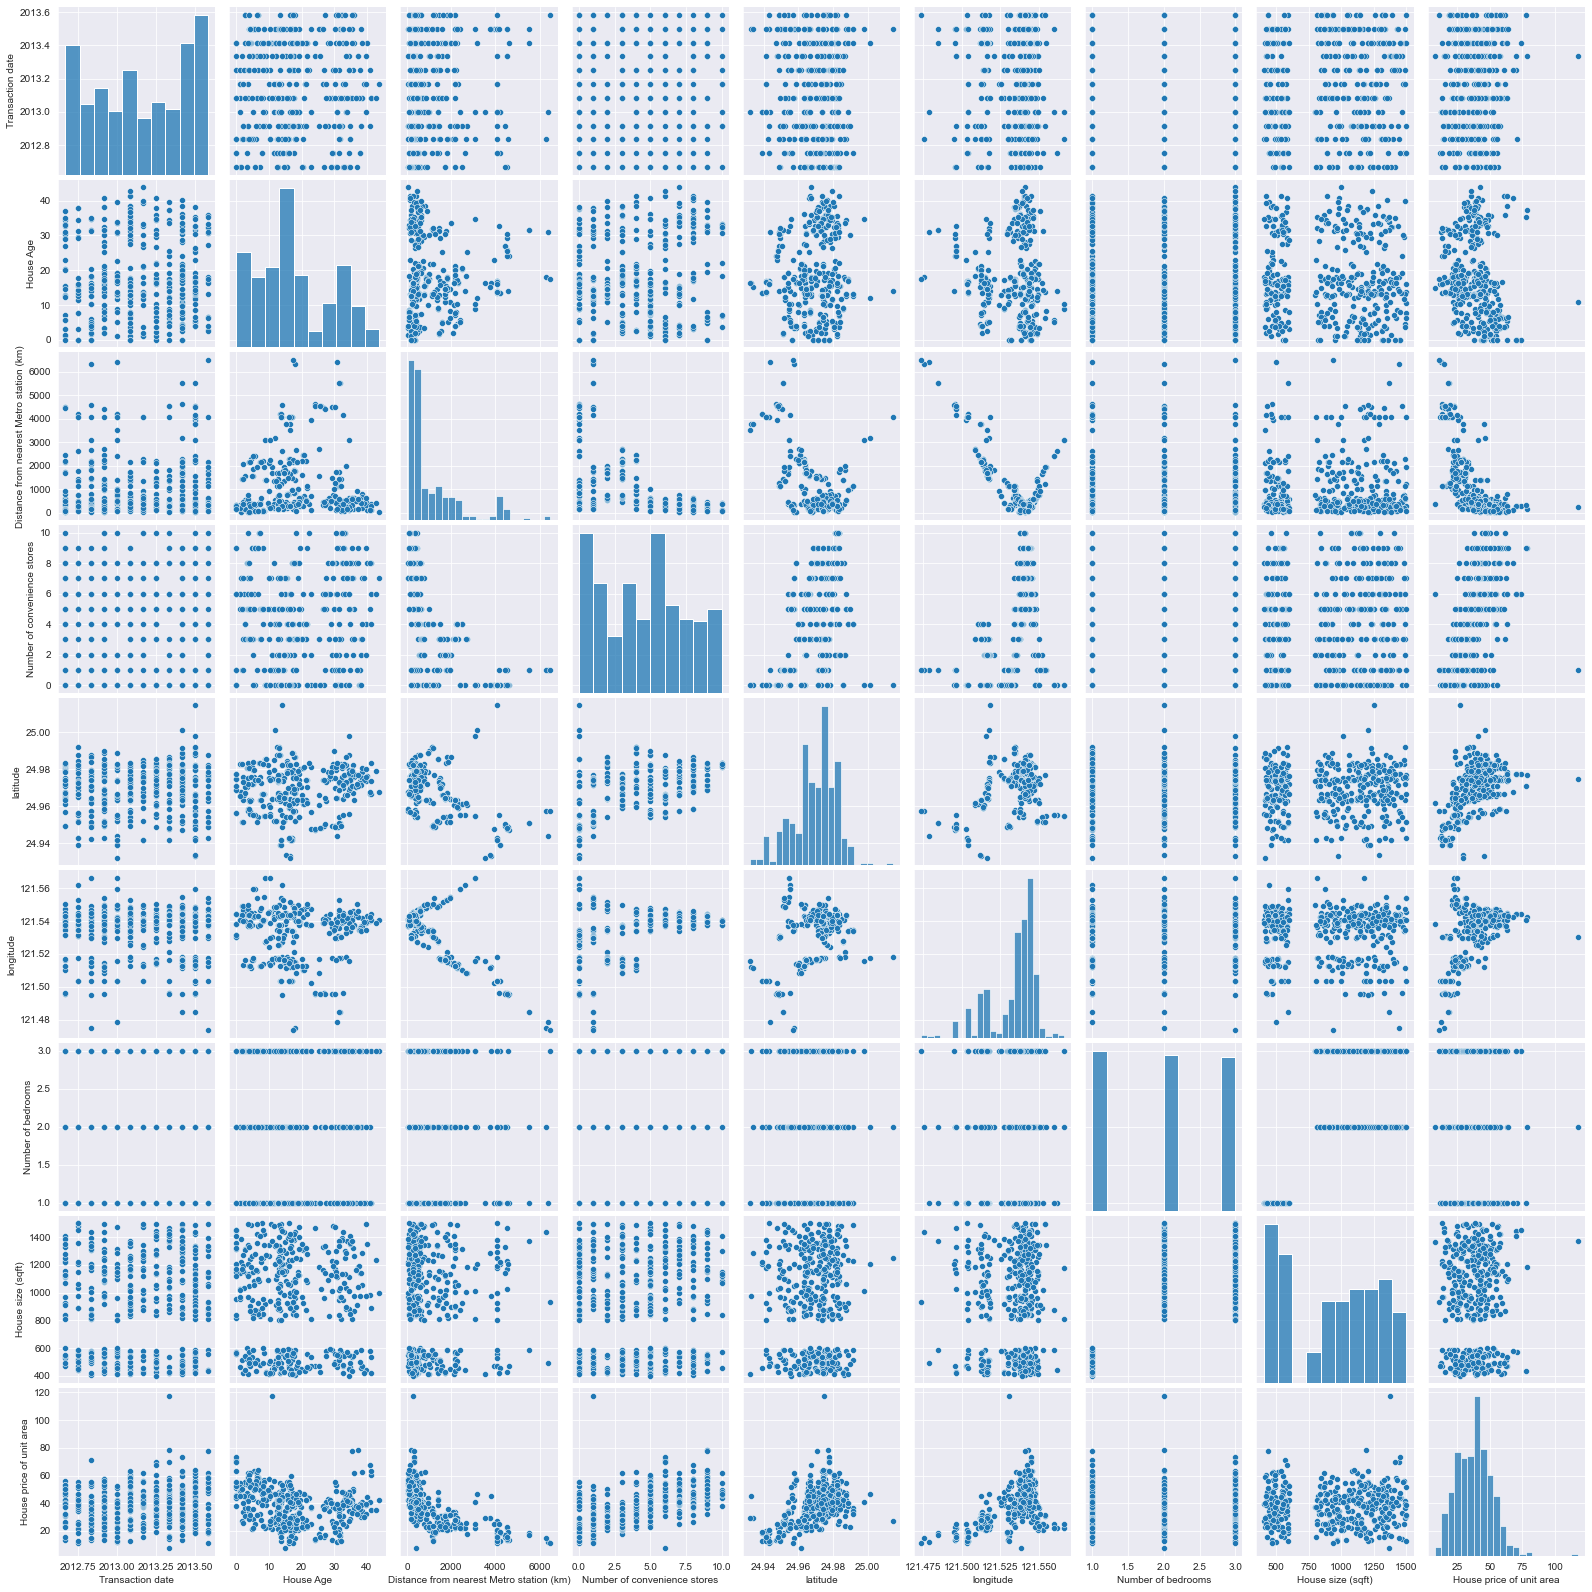

In [8]:
sns.pairplot(data)

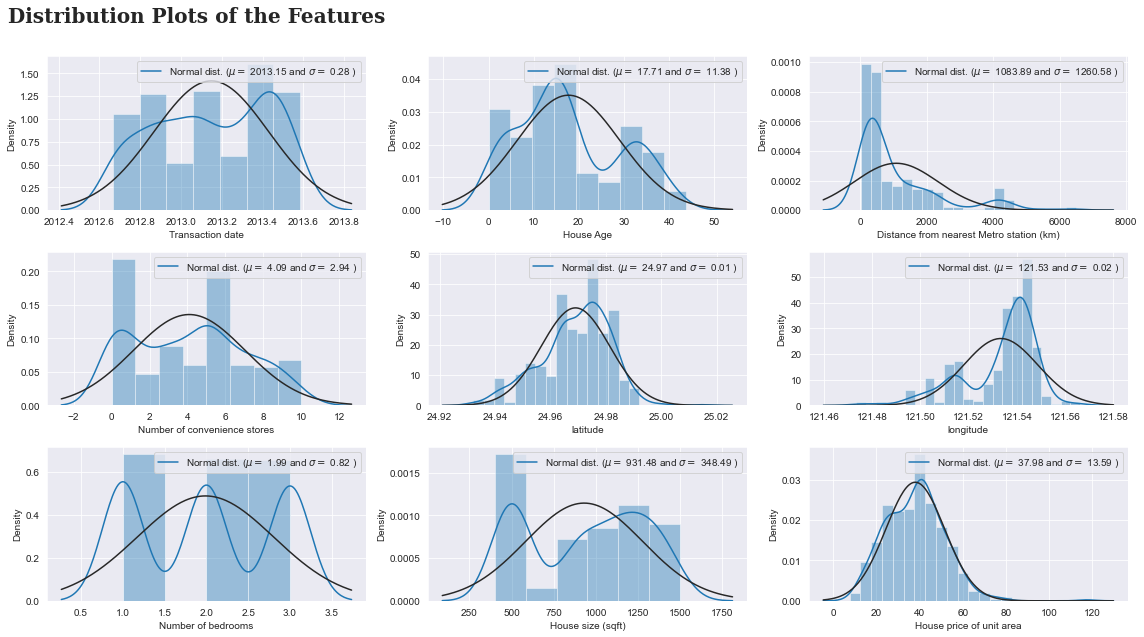

In [9]:
fig = plt.figure(figsize=(16,16))
for i,col in enumerate(data):
    (mu, sigma) = norm.fit(data[col])
    plt.subplot(6,3,i+1)
    sns.distplot(data[col], fit = norm)
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
fig.text(0.01, 1, 'Distribution Plots of the Features\n', fontsize=20, fontweight='bold',fontfamily='serif')
plt.tight_layout()
plt.show()

## Outlier Identification

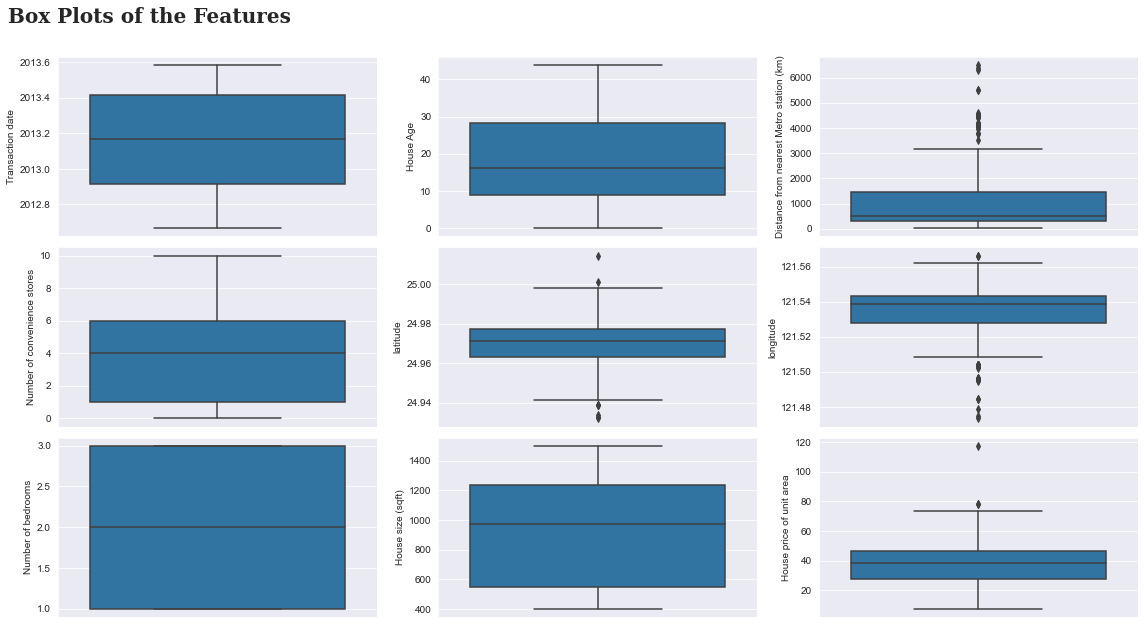

In [10]:
fig = plt.figure(figsize=(16,16))
for i,col in enumerate(data):
    plt.subplot(6,3,i+1)
    sns.boxplot(y = col, data = data)
    
fig.text(0.01, 1, 'Box Plots of the Features\n', fontsize=20, fontweight='bold',fontfamily='serif')
plt.tight_layout()
plt.show()

We may see there are outliers in some features. Outliers are important information but to many of them may cause in decreaing the accuracy of our model, therefore, we will be manually removing the outliers using the above information.

In [11]:
# Removing outliers
data = data[data['House price of unit area']<80]
data = data[data['Distance from nearest Metro station (km)']<3000]
data = data[data['longitude']>121.50]
data = data[(data['latitude']>24.92) & (data['latitude']<25.02)]

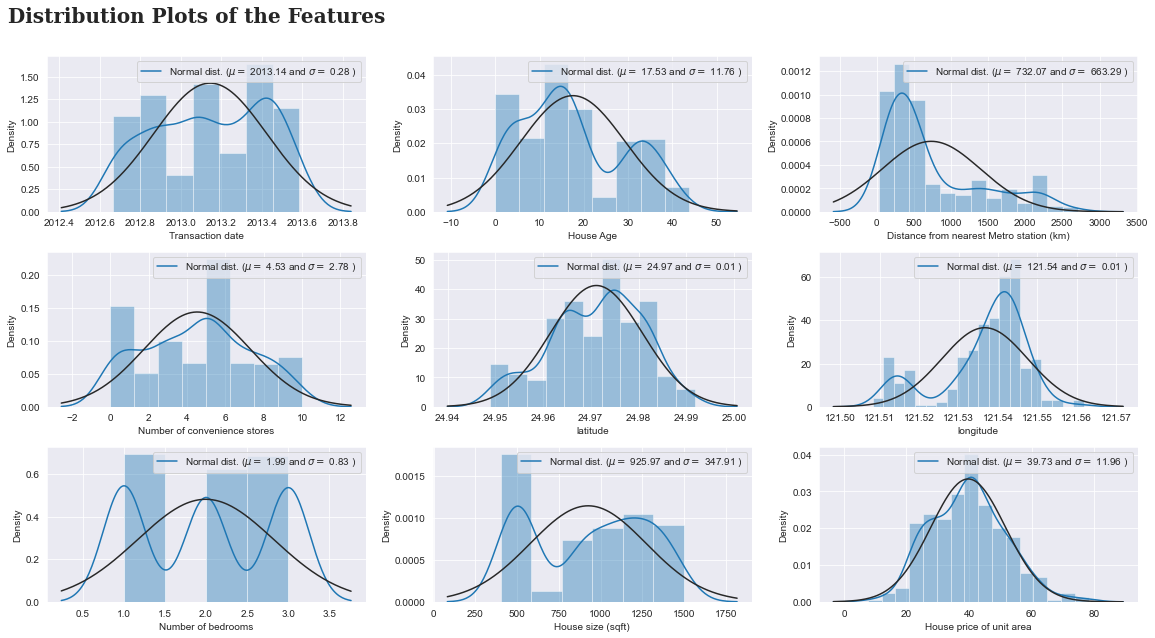

In [12]:
# Distplots of the features
fig = plt.figure(figsize=(16,16))
for i,col in enumerate(data):
    (mu, sigma) = norm.fit(data[col])
    plt.subplot(6,3,i+1)
    sns.distplot(data[col], fit = norm)
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
fig.text(0.01, 1, 'Distribution Plots of the Features\n', fontsize=20, fontweight='bold',fontfamily='serif')
plt.tight_layout()
plt.show()

Now it's look much better.

# Feature Engineering

Since the latitude and logitude of a house plays important part in determining the accurate price, we will be tranforming these features with the help of KMeans Clustering technique in order to maximize the usefulness of these two features.

## Latitude

In [13]:
k = data.groupby(['latitude'])['House price of unit area'].describe()
k = k.fillna(value = 0)
display(k.head())

,count,mean,std,min,25%,50%,75%,max
latitude,,,,,,,,
24.94883,2.0,18.7,0.565685,18.3,18.5,18.7,18.9,19.1
24.94890,1.0,19.0,0.000000,19.0,19.0,19.0,19.0,19.0
24.94920,1.0,16.1,0.000000,16.1,16.1,16.1,16.1,16.1
24.94935,1.0,12.8,0.000000,12.8,12.8,12.8,12.8,12.8
24.94960,1.0,13.8,0.000000,13.8,13.8,13.8,13.8,13.8


In [14]:
k_cluster = KMeans(n_clusters=5, random_state = 927)
k_cluster.fit(k)

KMeans(n_clusters=5, random_state=927)

Cluster 0
[24.95591 24.95744 24.95836 24.96495 24.96571 24.96581 24.96674 24.96719
 24.96725 24.96772 24.96853 24.96881 24.9711  24.972   24.97369 24.97417
 24.97433 24.97445 24.9748  24.97509 24.97528 24.97563 24.97585 24.97707
 24.97814 24.97838 24.97841 24.97937 24.98042 24.9805  24.98085 24.98123
 24.98155 24.98178 24.98182 24.98203 24.98223 24.98236 24.9824  24.98246
 24.98254 24.983   24.98343 24.98419 24.98489 24.98573 24.98746]
Cluster 1
[24.9512  24.95155 24.95182 24.95204 24.95425 24.95562 24.95593 24.95957
 24.96182 24.96299 24.96303 24.96305 24.96314 24.96324 24.9633  24.96334
 24.96398 24.96412 24.96447 24.96622 24.96871 24.96945 24.97003 24.97026
 24.97073 24.97198 24.9726  24.97371 24.97388 24.97429 24.97503 24.97519
 24.97542 24.97559 24.97598 24.97694 24.97746 24.97913 24.98016 24.98199
 24.9832  24.98326 24.98672 24.98748 24.99156]
Cluster 2
[24.95418 24.95618 24.95663 24.95776 24.96427 24.96431 24.96515 24.96604
 24.96606 24.96628 24.9663  24.96696 24.96735 24.9675  

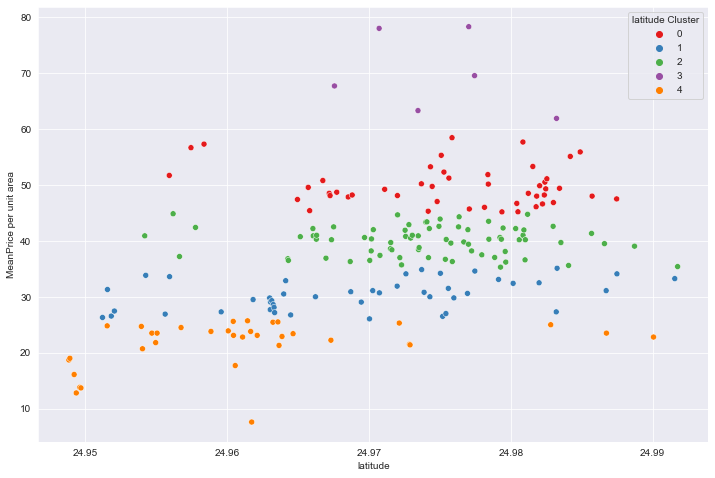

In [15]:
k_cluster_table = pd.DataFrame(zip(list(k.index),list(k.loc[:,'mean']),list(k_cluster.labels_)),
                               columns = ['latitude','MeanPrice per unit area','latitude Cluster'])
for i  in range(len(k_cluster_table.groupby('latitude Cluster')['latitude'].unique())):
    print("Cluster " + str(i))
    print(k_cluster_table.groupby('latitude Cluster')['latitude'].unique()[i])
plt.figure(figsize=(12,8))
sns.scatterplot(data = k_cluster_table, x='latitude',y = 'MeanPrice per unit area', hue='latitude Cluster',
                palette=sns.color_palette("Set1",5))
plt.show()

## Longitude

In [16]:
k1 = data.groupby(['longitude'])['House price of unit area'].describe()
k1 = k1.fillna(value = 0)
display(k1.head())

,count,mean,std,min,25%,50%,75%,max
longitude,,,,,,,,
121.50827,1.0,25.7,0.000000,25.7,25.7,25.7,25.7,25.7
121.50831,1.0,17.7,0.000000,17.7,17.7,17.7,17.7,17.7
121.51046,2.0,22.8,1.414214,21.8,22.3,22.8,23.3,23.8
121.51151,1.0,29.3,0.000000,29.3,29.3,29.3,29.3,29.3
121.51222,1.0,29.5,0.000000,29.5,29.5,29.5,29.5,29.5


In [17]:
k1_cluster = KMeans(n_clusters=5, random_state = 927)
k1_cluster.fit(k1)

KMeans(n_clusters=5, random_state=927)

Cluster 0
[121.50827 121.51151 121.51222 121.51237 121.51241 121.51243 121.51254
 121.51284 121.51329 121.51353 121.51623 121.51627 121.51642 121.51649
 121.51668 121.5167  121.517   121.51709 121.51726 121.5175  121.51812
 121.52091 121.52981 121.52984 121.53151 121.53381 121.53406 121.53561
 121.53666 121.53692 121.53872 121.53917 121.53932 121.5399  121.5425
 121.54301 121.5449  121.5458  121.54651 121.54767 121.54842 121.54887
 121.549   121.54915 121.54951 121.55063 121.55387 121.55391]
Cluster 1
[121.53477 121.53644 121.53711 121.53756 121.54039 121.54069 121.54093
 121.54121 121.5423  121.54243 121.54265 121.5431  121.54458 121.54516]
Cluster 2
[121.50831 121.51046 121.51252 121.51359 121.51361 121.51458 121.51462
 121.51471 121.51486 121.51531 121.51696 121.51728 121.5173  121.51844
 121.52954 121.53009 121.53018 121.53046 121.53076 121.53095 121.534
 121.5346  121.53812 121.54928 121.55011 121.55174 121.55254 121.55282
 121.55481 121.55964 121.56174]
Cluster 3
[121.52758 121.5

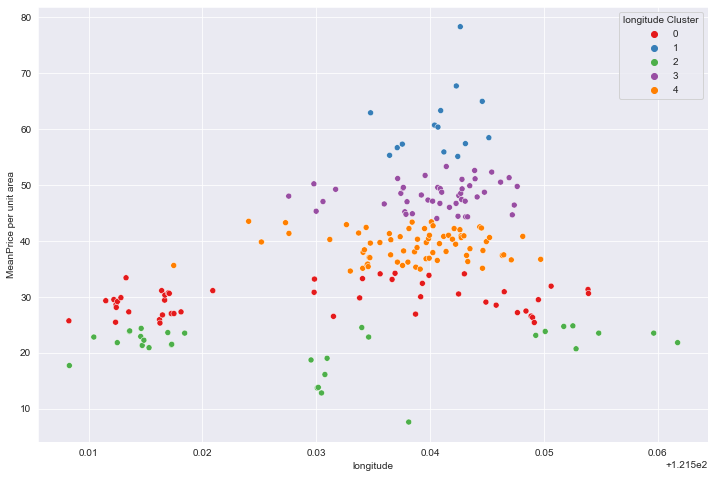

In [18]:
k1_cluster_table = pd.DataFrame(zip(list(k1.index),list(k1.loc[:,'mean']),list(k1_cluster.labels_)),
                                columns = ['longitude','MeanPrice per unit area','longitude Cluster'])
for i  in range(len(k1_cluster_table.groupby('longitude Cluster')['longitude'].unique())):
    print("Cluster " + str(i))
    print(k1_cluster_table.groupby('longitude Cluster')['longitude'].unique()[i])
plt.figure(figsize=(12,8))
sns.scatterplot(data = k1_cluster_table, x='longitude',y = 'MeanPrice per unit area', hue='longitude Cluster',
                palette=sns.color_palette("Set1",5))
plt.show()

In [19]:
# Adding the new features and removing the old ones.
k_cluster_table.drop('MeanPrice per unit area', axis = 1 ,inplace = True)
k1_cluster_table.drop('MeanPrice per unit area', axis = 1, inplace = True)

data = pd.merge(left = data.reset_index(), right = k_cluster_table, how='left', on ='latitude')
data = pd.merge(left = data.reset_index(), right = k1_cluster_table, how='left', on ='longitude')

data.drop(['level_0', 'index', 'latitude', 'longitude'], axis = 1, inplace = True)

# Encoding

We will e encoding the 'Transaction date' feature with the help of Label Encoder. Why we use Label Encoder? Because dates are counted as categorical feature.

In [20]:
enc = LabelEncoder()
data['Transaction date'] = enc.fit_transform(data['Transaction date'])

In [21]:
# Final dataset before modeling
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area,latitude Cluster,longitude Cluster
0,3,32.0,84.87882,10,1,575,37.9,2,4
1,3,19.5,306.59470,9,2,1240,42.2,2,4
2,11,13.3,561.98450,5,3,1060,47.3,0,3
3,10,13.3,561.98450,5,2,875,54.8,0,3
4,2,5.0,390.56840,5,1,491,43.1,0,3


# Feature Importance

## Correlation

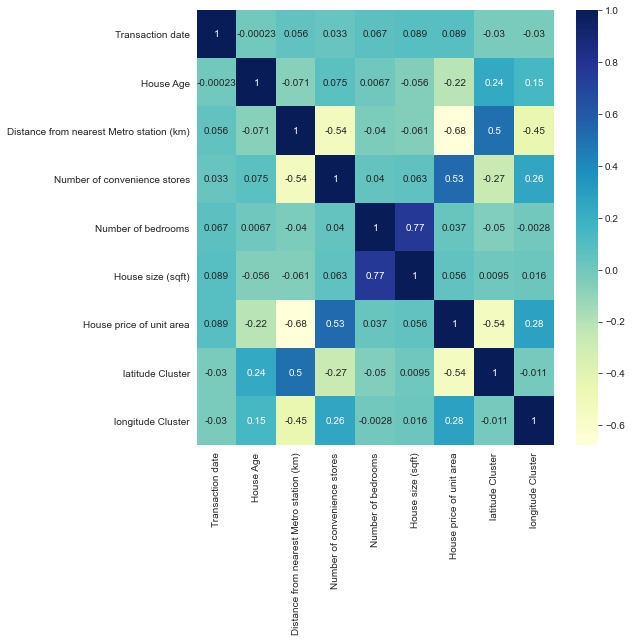

In [22]:
# Correlation
plt.figure(figsize =(8,8))
sns.heatmap(data.corr(), annot=True,cmap='YlGnBu')
plt.show()

## Important feature using ExtraTreesRegressor

In [23]:
# Splitting the datasets in Independent and Dependent features
X = data
y = X.pop('House price of unit area')

In [24]:
print('-'*30)
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)
print('-'*30)

------------------------------
Shape of X: (372, 8)
Shape of y: (372,)
------------------------------


In [25]:
# Using ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [26]:
print(selection.feature_importances_)

[0.02150771 0.03634253 0.22728425 0.06880812 0.0090642  0.01690843
 0.42844033 0.19164443]


Since we have find the importance features, now is the time for plotting them.

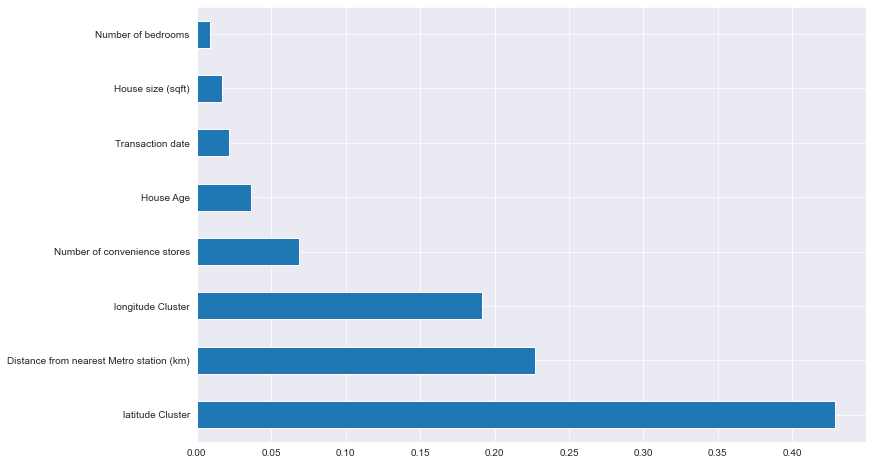

In [27]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Modeling

In this section we will be using different techniques with the help of the different models to find the best model with the highest accuracy.

## Train Test Split

We will be further splitting our datasets into Train and Test data and transforming the dependent features with the help of StandardScaler().

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

We will be creating a function which will calculate the best parameters for the model and calculate various metrices which help us to determine the accuracy of the models.

In [29]:
# Creating a function for predicting and creating metrics datsets while using RandomizedSearchCV
def search_random(model_name, model, paras):
    refine_model = RandomizedSearchCV(estimator = model, param_distributions = paras, scoring = 'neg_mean_squared_error',
                                        n_iter = 10, cv = 5, verbose = 2, random_state = 38, n_jobs = 2)
    model1 = refine_model.fit(X_train, y_train)
    pred = model1.predict(X_test)
    values = (model1, pred)
    df = pd.DataFrame({'MSE': mean_squared_error(y_test,pred), 'MSLE': mean_squared_log_error(y_test,pred), 
                       'RMSE': mean_squared_error(y_test,pred, squared=False), 
                       'RMSLE': np.sqrt(mean_squared_log_error(y_test,pred)),
                       'MAE': mean_absolute_error(y_test, pred), 'R2 Score': r2_score(y_test, pred)}, index=[model_name])

    return df

## Lasso Regression

In [30]:
parameters = {'alpha': [0.05, 0.0005, 0.00005, 0.005, 0.000005]}
lasso_df = search_random('Lasso Regression', Lasso(), parameters)

lasso_df

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    4.8s finished


,MSE,MSLE,RMSE,RMSLE,MAE,R2 Score
Lasso Regression,74.753524,0.038859,8.646012,0.197126,5.702262,0.503328


## Ridge Regression

In [31]:
parameters = {'alpha' : [1.0, 0.1, 0.001, 2.0, 5.0, 8.0, 10.0, 15.0, 0.0001]}

rid_df = search_random('Ridge Regression', Ridge() , parameters)

rid_df

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed:    0.5s finished


,MSE,MSLE,RMSE,RMSLE,MAE,R2 Score
Ridge Regression,75.01229,0.038374,8.660964,0.195893,5.687405,0.501609


## Huber Regression

In [32]:
parameters = {'alpha':[40,30,35,45], 'epsilon': [2,0.1,4,1], 'max_iter': [1000,2000,700,500]}

hub_df = search_random('Huber Regression', HuberRegressor() , parameters)

hub_df

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.8s finished


,MSE,MSLE,RMSE,RMSLE,MAE,R2 Score
Huber Regression,81.187211,0.041777,9.010395,0.204395,5.729714,0.460582


## RANSAC Regression

In [33]:
parameters = {'base_estimator': [LinearRegression(), Ridge(), Lasso()],'min_samples': [250,50,150,500],
              'max_trials':[100,200,300], 'residual_threshold': [10,20,5]}

ransac_df = search_random('RANSAC Regression', RANSACRegressor(), parameters)

ransac_df

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    4.6s finished


,MSE,MSLE,RMSE,RMSLE,MAE,R2 Score
RANSAC Regression,86.676387,0.043732,9.310015,0.209122,5.520145,0.424111


## SVR

In [34]:
parameters = {'C': [5,8,10,15], 'epsilon': [0.0005, 0.025,0.005,0.05], 'kernel': ['linear','sigmoid','rbf']}

svr_df = search_random('SVR', SVR(), parameters)

svr_df 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.3s finished


,MSE,MSLE,RMSE,RMSLE,MAE,R2 Score
SVR,69.112004,0.030895,8.313363,0.175771,4.983062,0.540811


## ElasticNet Regression

In [35]:
parameters = {'alpha': [0.0005, 0.005,0.05,0.5,1,5], 'l1_ratio' : [0.9, 0.8, 0.5, 0.1, 0.99], 'random_state' : [3, 32, 42],
             'max_iter' : [1000, 500, 2000, 1500]}

net_df = search_random('ElasticNet Regression', ElasticNet(), parameters)

net_df

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,MSE,MSLE,RMSE,RMSLE,MAE,R2 Score
ElasticNet Regression,74.885179,0.038628,8.653622,0.196541,5.696654,0.502454


## Random Forest Regression

In [36]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10]

parameters = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 
              'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

rand_df = search_random('Random Forest Regression', RandomForestRegressor(), parameters)

rand_df

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   18.3s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   25.5s finished


,MSE,MSLE,RMSE,RMSLE,MAE,R2 Score
Random Forest Regression,20.988124,0.012307,4.58128,0.110939,3.300844,0.860552


## XGBoost Regression

In [37]:
parameters = {'colsample_bytree': [0.2,0.1,0.3,0.4,0.5], 'gamma': [0.0,0.1,0.01,0.2], 'learning_rate': [0.01, 0.1, 0.2,0.5], 
              'max_depth' : [4, 5, 7, 10, 15], 'min_child_weight': [1.5, 0.5, 2, 3, 5], 
              'n_estimators' : [7200, 5000, 1000, 10000], 'reg_alpha' : [0.9, 0.5, 0.1, 0.99], 
              'reg_lambda' : [0.6, 0.4, 0.9, 0.2], 'subsample' : [0.2, 2, 5, 0.5], 'seed' : [42, 40, 50]}
                           
xgb_df = search_random('XGBoost Regression', XGBRegressor(), parameters)

xgb_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:  2.1min finished


,MSE,MSLE,RMSE,RMSLE,MAE,R2 Score
XGBoost Regression,28.295676,0.017921,5.319368,0.13387,4.066102,0.812


## CatBoost Regression

In [38]:
parameters = {'learning_rate': [0.001, 0.01, 0.004], 'min_child_samples': randint(1, 100),
              'grow_policy' : ['Depthwise'],'iterations': [8000, 2000, 10000, 1000],'od_type': ['Iter', 'Wilcoxon', 'IncToDec'],
              'subsample': uniform(loc=0.2, scale=0.8), 'depth': [5, 11, 15, 20], 'loss_function' : ['RMSE'],
              'logging_level' : ['Silent'], 'od_wait': [50, 100], 'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
                                                                         
cat_df = search_random('CatBoost Regression', CatBoostRegressor() , parameters)

cat_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   42.7s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed: 14.4min finished


,MSE,MSLE,RMSE,RMSLE,MAE,R2 Score
CatBoost Regression,24.468544,0.01393,4.946569,0.118026,3.627702,0.837428


## Decision Tree Regression

In [39]:
parameters={"max_depth":[*range(3,10,2),None], "max_features":[*range(3,10,2),None], "min_samples_leaf":list(range(1,10,2)),
            "criterion":['mse', "friedman_mse", "mae"]}

tree_df = search_random('Decision Tree Regression', DecisionTreeRegressor() , parameters)

tree_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.3s finished


,MSE,MSLE,RMSE,RMSLE,MAE,R2 Score
Decision Tree Regression,49.593154,0.023664,7.042241,0.153831,4.367512,0.670497


# Model Results

Concating the results of all the algorithms.

In [40]:
summary = pd.concat([lasso_df, rid_df, hub_df, ransac_df, svr_df, net_df, rand_df, xgb_df, cat_df, tree_df])
summary

,MSE,MSLE,RMSE,RMSLE,MAE,R2 Score
Lasso Regression,74.753524,0.038859,8.646012,0.197126,5.702262,0.503328
Ridge Regression,75.012290,0.038374,8.660964,0.195893,5.687405,0.501609
Huber Regression,81.187211,0.041777,9.010395,0.204395,5.729714,0.460582
RANSAC Regression,86.676387,0.043732,9.310015,0.209122,5.520145,0.424111
SVR,69.112004,0.030895,8.313363,0.175771,4.983062,0.540811
ElasticNet Regression,74.885179,0.038628,8.653622,0.196541,5.696654,0.502454
Random Forest Regression,20.988124,0.012307,4.581280,0.110939,3.300844,0.860552
XGBoost Regression,28.295676,0.017921,5.319368,0.133870,4.066102,0.812000
CatBoost Regression,24.468544,0.013930,4.946569,0.118026,3.627702,0.837428
Decision Tree Regression,49.593154,0.023664,7.042241,0.153831,4.367512,0.670497


From the above the data we can conclude that the best model that can be used based on the above results is **Random Forest Regression**. Lets visualize the scores to get better insights.

## Visualization of Scores

* **MSE**

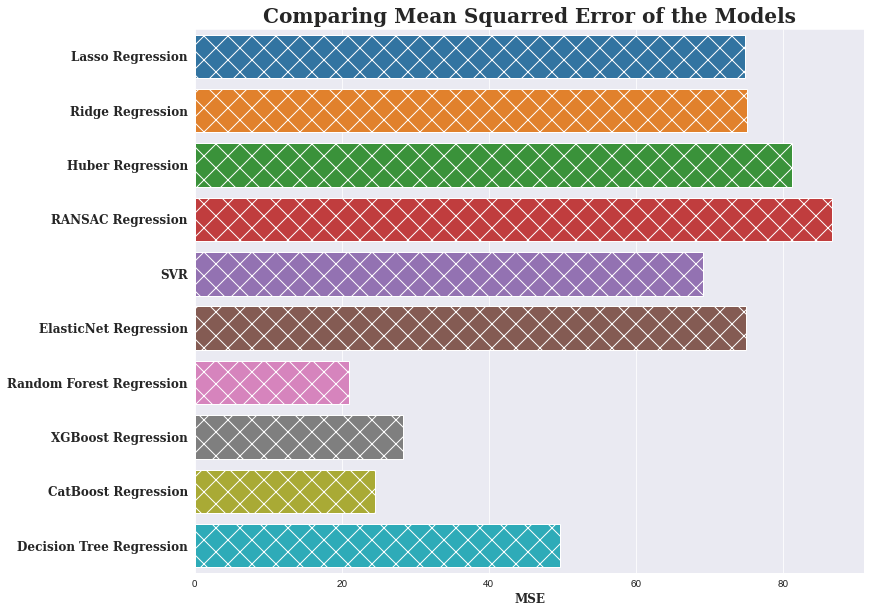

In [52]:
plt.figure(figsize=(12,10))
sns.barplot(data = summary, x = 'MSE', y = summary.index, hatch = '\/')
plt.title('Comparing Mean Squarred Error of the Models', fontweight='bold', fontfamily='serif', fontsize = 20)
plt.yticks(fontweight='bold', fontfamily='serif', fontsize = 12)
plt.xlabel('MSE', fontweight='bold', fontfamily='serif', fontsize = 12)
plt.show()

* **MSLE**

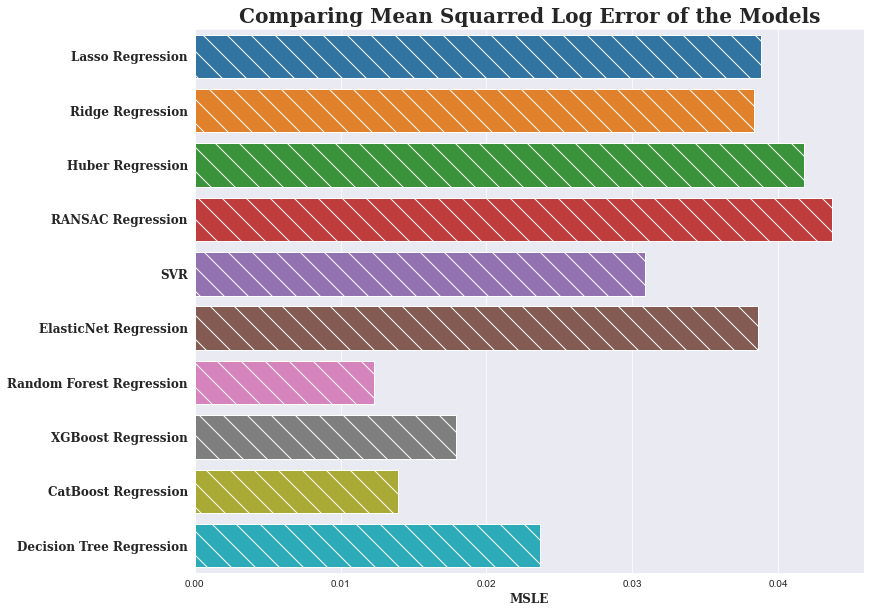

In [53]:
plt.figure(figsize=(12,10))
sns.barplot(data = summary, x = 'MSLE', y = summary.index, hatch = '\\')
plt.title('Comparing Mean Squarred Log Error of the Models', fontweight='bold', fontfamily='serif', fontsize = 20)
plt.yticks(fontweight='bold', fontfamily='serif', fontsize = 12)
plt.xlabel('MSLE', fontweight='bold', fontfamily='serif', fontsize = 12)
plt.show()

* **RMSE**

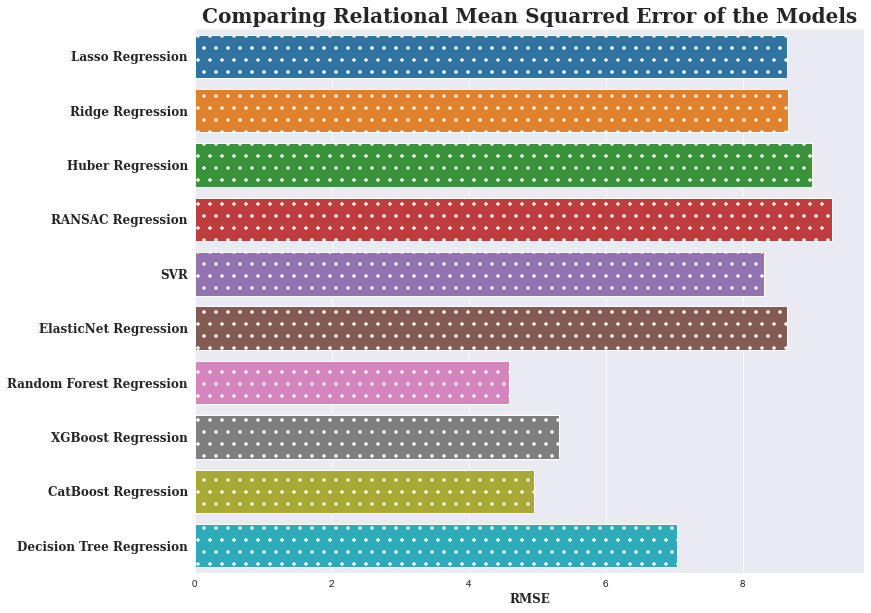

In [54]:
plt.figure(figsize=(12,10))
sns.barplot(data = summary, x = 'RMSE', y = summary.index, hatch = '.')
plt.title('Comparing Relational Mean Squarred Error of the Models', fontweight='bold', fontfamily='serif', fontsize = 20)
plt.yticks(fontweight='bold', fontfamily='serif', fontsize = 12)
plt.xlabel('RMSE', fontweight='bold', fontfamily='serif', fontsize = 12)
plt.show()

* **RMSLE**

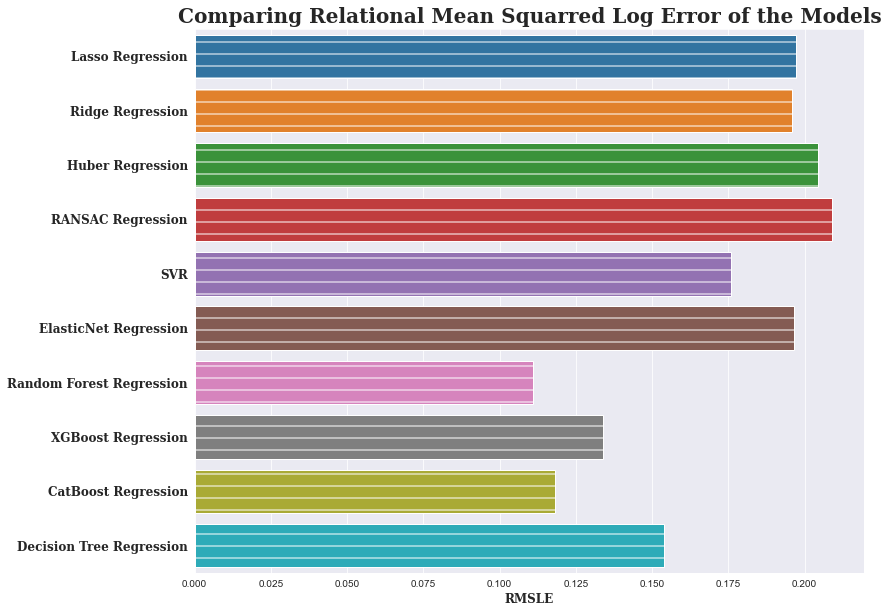

In [55]:
plt.figure(figsize=(12,10))
sns.barplot(data = summary, x = 'RMSLE', y = summary.index, hatch = '-')
plt.title('Comparing Relational Mean Squarred Log Error of the Models', fontweight='bold', fontfamily='serif', fontsize = 20)
plt.yticks(fontweight='bold', fontfamily='serif', fontsize = 12)
plt.xlabel('RMSLE', fontweight='bold', fontfamily='serif', fontsize = 12)
plt.show()

* **MAE**

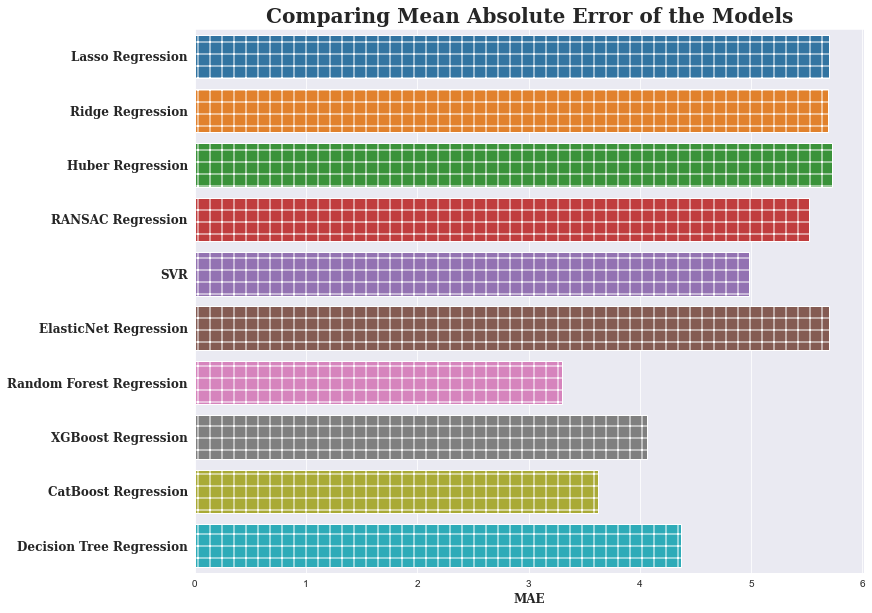

In [56]:
plt.figure(figsize=(12,10))
sns.barplot(data = summary, x = 'MAE', y = summary.index, hatch = '+')
plt.title('Comparing Mean Absolute Error of the Models', fontweight='bold', fontfamily='serif', fontsize = 20)
plt.yticks(fontweight='bold', fontfamily='serif', fontsize = 12)
plt.xlabel('MAE', fontweight='bold', fontfamily='serif', fontsize = 12)
plt.show()

* **R2 Score**

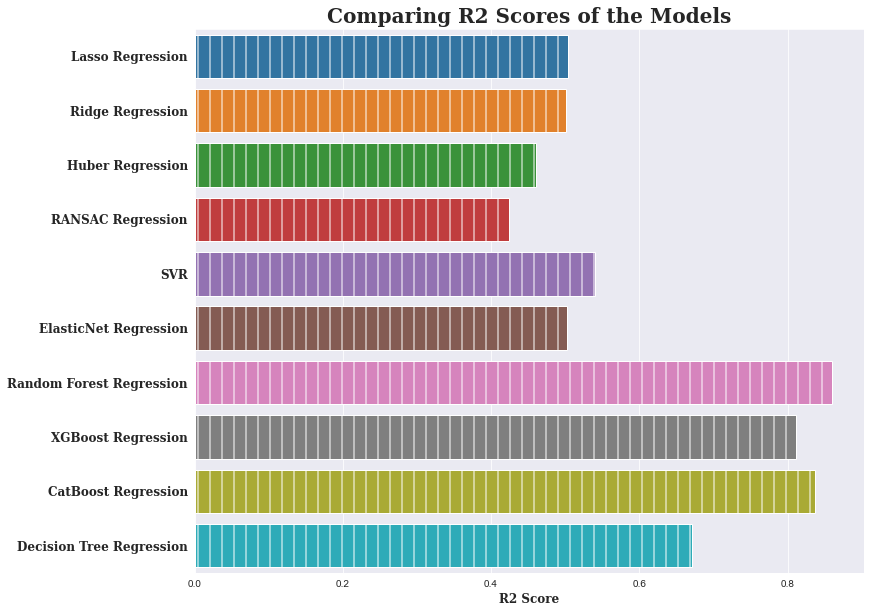

In [57]:
plt.figure(figsize=(12,10))
sns.barplot(data = summary, x = 'R2 Score', y = summary.index, hatch = '|')
plt.title('Comparing R2 Scores of the Models', fontweight='bold', fontfamily='serif', fontsize = 20)
plt.yticks(fontweight='bold', fontfamily='serif', fontsize = 12)
plt.xlabel('R2 Score', fontweight='bold', fontfamily='serif', fontsize = 12)
plt.show()

# Conclusions:

* Applying clustering techniques on 'latitude' and 'longitude' features increases there importance in the predictions.


* Simple Linear models such as Lasso, Ridge, Huber, RANSAC and Elastic Net doesn't perform that well when compared to Tree based models. This may be due to the non-linearity of the features.


* The Tree based models (Random Forest, XGBoost, CatBoost and Decision Tree) performed pretty well giving us a R2 score of 80 and above. Random Forest Regressor performed the best giving us 0.86 R2 score followed by CatBoost and XGBoost.